In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

In [2]:
df_transactions = pd.read_csv('transactions.txt', sep=';', header=None)

In [3]:
df_transactions.columns = ['customer_id', 'credit', 'amount', 'counterparty_country']

In [4]:
df_transactions[:5]

,customer_id,credit,amount,counterparty_country
0,8345,Debit,4342,SE
1,3138,Debit,5852,SE
2,5233,Debit,3517,SE
3,8634,Debit,5325,DK
4,8076,Credit,4815,SE


In [5]:
df_transactions['amount_tilde'] = df_transactions.apply(lambda row: row.amount if 
                                                        row.credit == 'Credit' else - row.amount, axis=1)

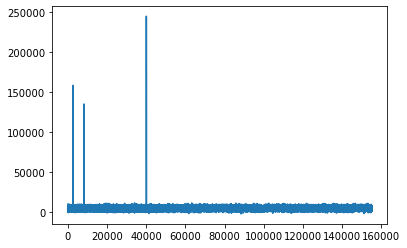

In [6]:
plt.plot(df_transactions.index, df_transactions.amount)

(0.0, 10000.0)

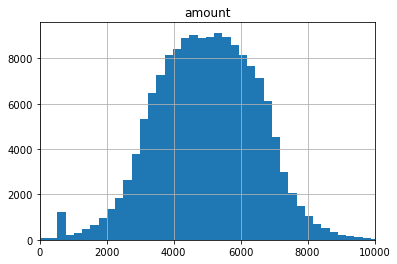

In [7]:
df_transactions.hist('amount', bins=1000)

plt.xlim(0, 10000) # 5-800

(0.0, 200.0)

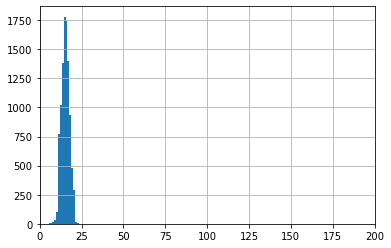

In [8]:
df_transactions.groupby(['customer_id'])['amount'].count().hist(bins=1000)

plt.xlim(0, 200)

In [9]:
df_transactions.groupby(['customer_id'])['amount'].count().sort_values(ascending=False)

customer_id
5860    1123
8286      25
2911      23
8531      23
6108      23
        ... 
6902       6
2985       5
1467       4
1223       3
8816       2
Name: amount, Length: 10000, dtype: int64

In [10]:
df_transactions[df_transactions.customer_id == 5860].groupby('credit')['amount'].sum()

credit
Credit    479238
Debit     333734
Name: amount, dtype: int64

In [11]:
df_transactions.counterparty_country.unique()

array(['SE', 'DK', 'FI', 'RO'], dtype=object)

In [12]:
df_transactions.describe()

,customer_id,amount,amount_tilde
count,155181.000000,155181.000000,155181.000000
mean,5002.995457,4982.829180,3.054775
std,2880.680223,1724.218339,5272.728533
min,0.000000,-2187.000000,-244351.000000
25%,2512.000000,3910.000000,-4998.000000
50%,5030.000000,5001.000000,478.000000
75%,7483.000000,6087.000000,5005.000000
max,9999.000000,244351.000000,134929.000000


In [13]:
sequence = df_transactions.groupby('customer_id').amount_tilde.agg(list).to_frame()

In [14]:
sequence['amount_tilde_truncated'] = sequence['amount_tilde'].apply(lambda lis: lis[:25])

In [15]:
sequence_transitions = sequence['amount_tilde_truncated'].apply(pd.Series)
sequence_transitions = sequence_transitions.fillna(0)

In [16]:
sequence_transitions[:5]

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
customer_id,,,,,,,,,,,,,,,,,,,,,
0,5702.0,3622.0,-3561.0,-2879.0,4708.0,4641.0,3155.0,-2960.0,3945.0,-5345.0,...,-5070.0,-3516.0,-4602.0,3418.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3098.0,-5265.0,5240.0,-5860.0,-3561.0,-4153.0,-5969.0,-4508.0,-4574.0,4560.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4836.0,4225.0,-4608.0,4168.0,4349.0,-4755.0,4440.0,-4737.0,4799.0,4328.0,...,4540.0,-4674.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-4210.0,4527.0,4189.0,3313.0,4634.0,2759.0,4953.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-4912.0,-4892.0,4538.0,5085.0,-4395.0,-5569.0,-5133.0,-4114.0,4342.0,5147.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [48]:
x = StandardScaler().fit_transform(sequence_transitions)
columns = ['principal component {}'.format(i) for i in range (1, 26)]
pca = PCA(n_components=25)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = columns)

principalDf[:5]
#pca.explained_variance_ratio_

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,principal component 21,principal component 22,principal component 23,principal component 24,principal component 25
0,0.013072,-0.050503,-0.545603,-0.750766,-0.222931,0.030161,-0.516539,0.550458,2.026735,2.623613,...,0.012867,0.200915,-0.129059,1.921338,0.810813,-1.698451,0.734355,-0.280255,0.142946,-0.002010
1,0.022728,-0.292433,0.133186,-0.506905,1.682602,-0.192299,-0.046884,0.699120,-0.132414,-0.070583,...,0.103187,0.030808,-0.643166,-0.066006,0.289053,0.414801,-0.969173,-0.204876,-0.029546,-0.001701
2,-0.067829,0.395455,0.302064,0.972047,0.113118,0.568095,0.926758,-1.012706,-0.606267,0.740326,...,-1.048448,-0.500770,-0.394954,1.051005,-0.751193,-0.753428,1.433820,-0.086285,0.034510,-0.001645
3,0.009156,-0.132287,-0.247126,-0.067694,0.087826,0.630593,0.173667,-0.479611,-0.292495,0.224146,...,-0.102582,-0.822416,0.877220,0.037207,-0.622197,-0.265223,-0.200591,0.148969,-0.025968,-0.000771
4,-0.054629,-0.398409,-0.330911,1.204389,0.824433,-0.641572,1.209175,-1.117246,-0.590371,0.067103,...,1.645709,0.328914,-0.671774,-0.187171,0.216970,-0.129553,-0.411902,-0.148837,-0.004658,-0.001671


array([0.10138304, 0.04749796, 0.04380563, 0.0430505 , 0.04246021,
       0.04202876, 0.04186471, 0.04154257, 0.04112899, 0.04048225,
       0.04040836, 0.04021779, 0.0400129 , 0.03954885, 0.03883039,
       0.03864621, 0.03838463, 0.03794723, 0.03751964, 0.03733128,
       0.03680687, 0.03621849, 0.02957012, 0.02229029, 0.00102231])

In [19]:
from sklearn.cluster import KMeans
from tqdm import tqdm

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [165]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(sequence_transitions)

wcss = []

for i in tqdm(range(100, 105), total=5):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(sequence_transitions)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(100, 105), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


100%|██████████| 5/5 [01:06<00:00, 13.38s/it]


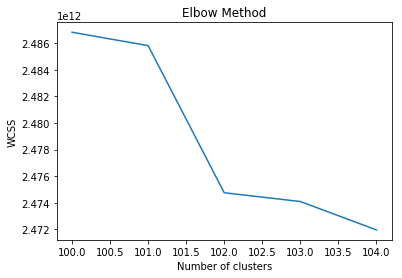

In [42]:
df_transactions['cluster'] = df_transactions.apply(lambda row: int(row.name / (173*3)), axis=1)

In [44]:
df_transactions.max()

customer_id               9999
credit                   Debit
amount                  244351
counterparty_country        SE
amount_tilde            134929
cluster                    298
dtype: object

In [45]:
clusters_agg = df_transactions.groupby(
    ['cluster', 'credit', 'counterparty_country'])[['customer_id', 'amount']].agg(
    {'customer_id': 'count', 'amount': 'sum'}).reset_index()

In [46]:
means = clusters_agg.groupby(['credit', 'counterparty_country'])[['amount', 'customer_id']].mean().reset_index()
stds = clusters_agg.groupby(['credit', 'counterparty_country'])[['amount', 'customer_id']].std().reset_index()

In [47]:
sums_cluster = clusters_agg.groupby(
    ['cluster', 'credit'])[['amount', 'customer_id']].sum().reset_index()

<AxesSubplot:>

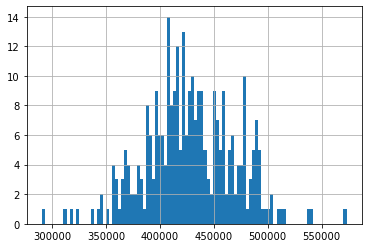

In [48]:
clusters_agg[(clusters_agg.credit == 'Debit') & (clusters_agg.counterparty_country == 'SE')]['amount'].hist(bins=100)

In [49]:
clusters_agg = clusters_agg.merge(means, on=['credit', 'counterparty_country'], how='left', suffixes=['', '_mean'])
clusters_agg = clusters_agg.merge(stds, on=['credit', 'counterparty_country'], how='left', suffixes=['', '_std'])

In [50]:
clusters_agg = clusters_agg.merge(
    sums_cluster, on=['cluster', 'credit'], how='left', suffixes=['', '_sum_cluster'])

In [51]:
clusters_agg['count_transactions_at_risk'] = clusters_agg.apply(lambda row: 0 if np.abs(row.customer_id_mean - row.customer_id) <= row.customer_id_std * 3 else 1, axis=1)
clusters_agg['amount_at_risk'] = clusters_agg.apply(lambda row: 0 if np.abs(row.amount_mean - row.amount) <= row.amount_std * 3 else 1, axis=1)

In [52]:
clusters_agg[:5]

,cluster,credit,counterparty_country,customer_id,amount,amount_mean,customer_id_mean,amount_std,customer_id_std,amount_sum_cluster,customer_id_sum_cluster,count_transactions_at_risk,amount_at_risk
0,0,Credit,DK,85,395163,427294.555184,85.812709,43304.609057,8.504936,1177170,244,0,0
1,0,Credit,FI,84,413109,435453.397993,87.351171,46091.473529,8.802861,1177170,244,0,0
2,0,Credit,SE,75,368898,428834.839465,86.150502,47829.825560,8.961182,1177170,244,0,0
3,0,Debit,DK,89,406230,434820.682274,86.989967,48573.304921,8.727218,1177217,275,0,0
4,0,Debit,FI,94,413556,427489.698997,85.672241,43229.492468,8.508559,1177217,275,0,0


In [53]:
clusters_agg['amount_perc'] = clusters_agg.amount / clusters_agg.amount_sum_cluster
clusters_agg['customer_id_perc'] = clusters_agg.customer_id / clusters_agg.customer_id_sum_cluster

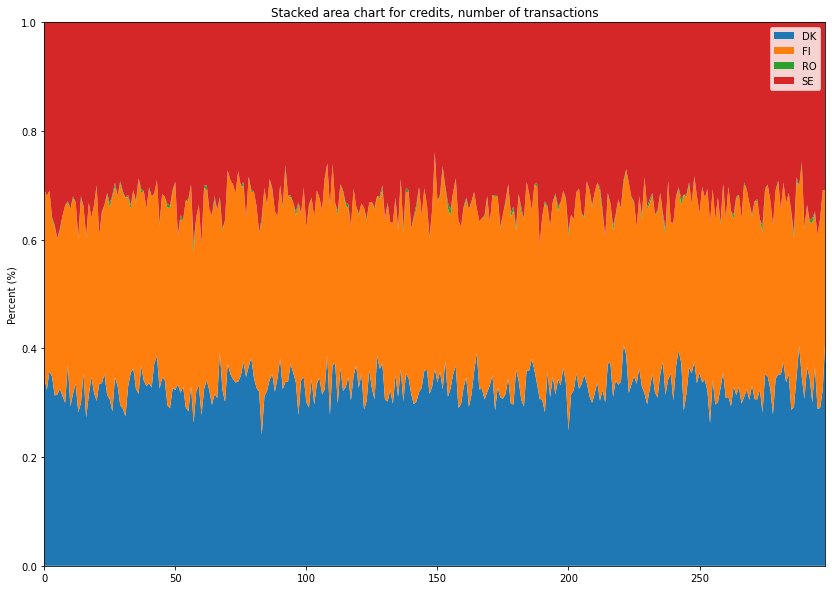

In [56]:
pivot_credit_count = clusters_agg[clusters_agg.credit == 'Credit'].pivot(
    index ='cluster', columns = 'counterparty_country', values = ['customer_id_perc']).fillna(0).droplevel(level=0, axis=1)

plt.figure(figsize=(14, 10))

#ax = pivot_credit_count.plot(kind='area', stacked=True, title='100 % stacked area chart')
plt.stackplot(pivot_credit_count.index, pivot_credit_count.DK, 
             pivot_credit_count.FI, pivot_credit_count.RO, pivot_credit_count.SE, labels=['DK', 'FI', 'RO', 'SE'])
plt.title('Stacked area chart for credits, number of transactions')
plt.ylabel('Percent (%)')
plt.margins(0, 0) # Set margins to avoid "whitespace"
plt.legend()

plt.show()

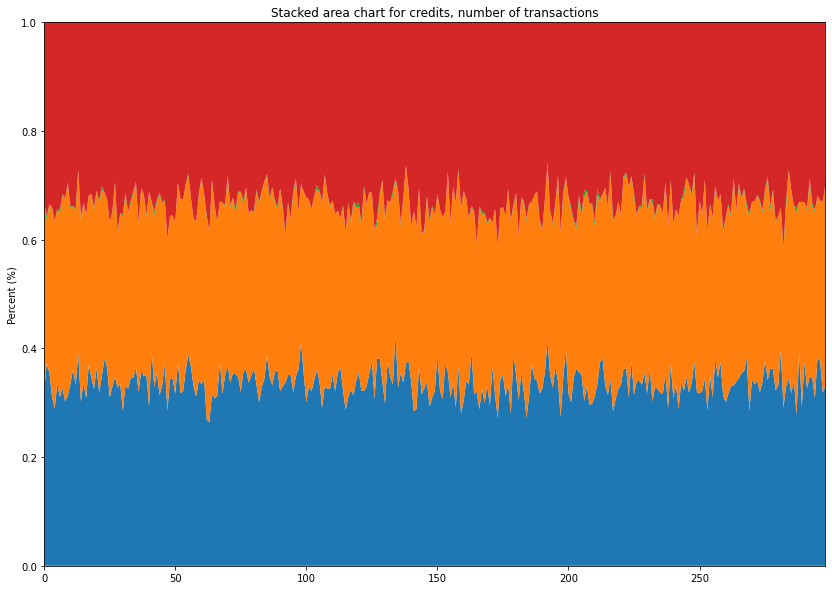

In [57]:
pivot_credit_count = clusters_agg[clusters_agg.credit == 'Debit'].pivot(
    index ='cluster', columns = 'counterparty_country', values = ['customer_id_perc']).fillna(0).droplevel(level=0, axis=1)

plt.figure(figsize=(14, 10))

#ax = pivot_credit_count.plot(kind='area', stacked=True, title='100 % stacked area chart')
plt.stackplot(pivot_credit_count.index, pivot_credit_count.DK, 
             pivot_credit_count.FI, pivot_credit_count.RO, pivot_credit_count.SE,  labels=['DK', 'FI', 'RO', 'SE'])
plt.title('Stacked area chart for credits, number of transactions')
plt.ylabel('Percent (%)')
plt.margins(0, 0) # Set margins to avoid "whitespace"

plt.show()

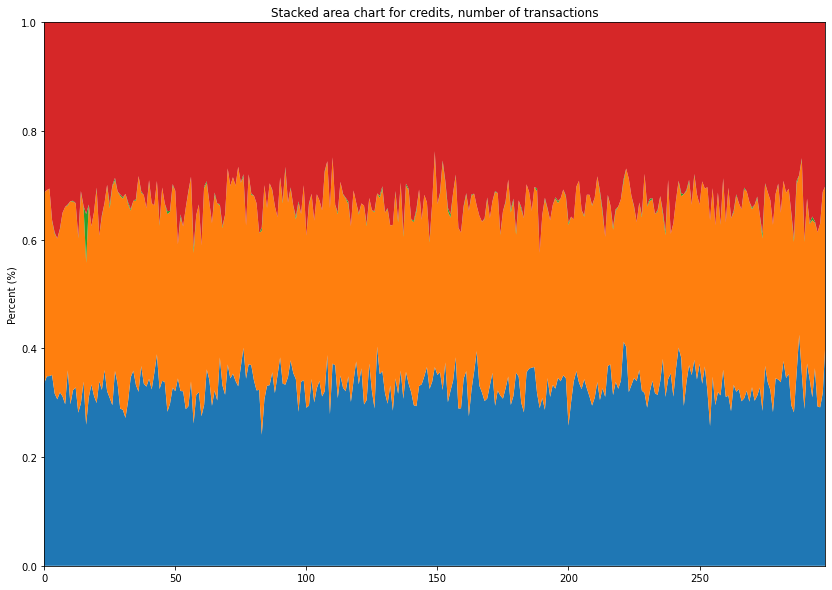

In [58]:
pivot_credit_count = clusters_agg[clusters_agg.credit == 'Credit'].pivot(
    index ='cluster', columns = 'counterparty_country', values = ['amount_perc']).fillna(0).droplevel(level=0, axis=1)

plt.figure(figsize=(14, 10))

#ax = pivot_credit_count.plot(kind='area', stacked=True, title='100 % stacked area chart')
plt.stackplot(pivot_credit_count.index, pivot_credit_count.DK, 
             pivot_credit_count.FI, pivot_credit_count.RO, pivot_credit_count.SE, labels=['DK', 'FI', 'RO', 'SE'])
plt.title('Stacked area chart for credits, number of transactions')
plt.ylabel('Percent (%)')
plt.margins(0, 0) # Set margins to avoid "whitespace"

plt.show()

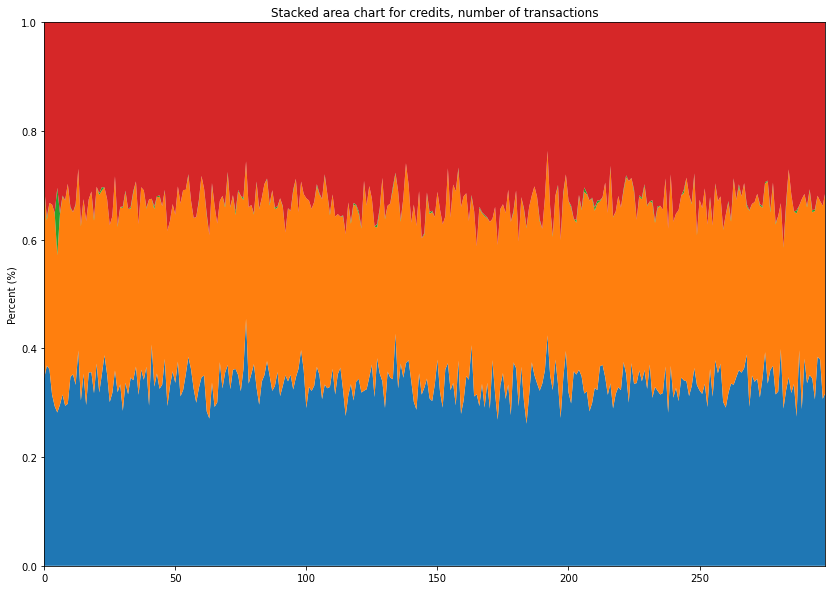

In [59]:
pivot_credit_count = clusters_agg[clusters_agg.credit == 'Debit'].pivot(
    index ='cluster', columns = 'counterparty_country', values = ['amount_perc']).fillna(0).droplevel(level=0, axis=1)

plt.figure(figsize=(14, 10))

#ax = pivot_credit_count.plot(kind='area', stacked=True, title='100 % stacked area chart')
plt.stackplot(pivot_credit_count.index, pivot_credit_count.DK, 
             pivot_credit_count.FI, pivot_credit_count.RO, pivot_credit_count.SE,  labels=['DK', 'FI', 'RO', 'SE'])
plt.title('Stacked area chart for credits, number of transactions')
plt.ylabel('Percent (%)')
plt.margins(0, 0) # Set margins to avoid "whitespace"

plt.show()

In [63]:
df_transactions['cluster'] = df_transactions.apply(lambda row: int(row.name / (173*3*13)), axis=1)

In [64]:
df_transactions[df_transactions.customer_id == 5958]

,customer_id,credit,amount,counterparty_country,amount_tilde,cluster
1224,5958,Credit,2311,DK,2311,0
6369,5958,Credit,6347,FI,6347,0
8518,5958,Credit,7062,FI,7062,1
11292,5958,Credit,3179,SE,3179,1
12706,5958,Credit,2100,DK,2100,1
21869,5958,Debit,3957,SE,-3957,3
30802,5958,Debit,5170,SE,-5170,4
50310,5958,Debit,3958,DK,-3958,7


In [65]:
df_transactions.cluster.max()

22

In [66]:
#df_transactions_original = df_transactions.copy()
#df_transactions_cleaner = df_transactions[df_transactions.customer_id <> 5860].copy()

## table customers:

In [69]:
# for each customer_id:
#
# total amount of credit  x
# total amount of debit   x
# total count of credits  x
# total count of debits  x
# frequency of transactions debit/credit, in cluster
# amount in each cluster
# distribution of transactions in each country, debit/credit
# amount % in each country, debit/credit
# incidence % of credits over total transactions  x
# amount of credits over total transactions  x
# distribution of amounts per customer
#
#

In [70]:
customers = df_transactions.groupby(['customer_id'])[['amount', 'credit']].agg(
    {'credit': 'count', 'amount': 'sum'}).reset_index().rename(
    columns={'amount': 'total_amount', 'credit': 'total_transactions'})

In [71]:
customer_debit = df_transactions.groupby(['customer_id', 'credit'])[['amount', 'cluster']].agg(
    {'cluster': 'count', 'amount': 'sum'}).reset_index()

In [72]:
customers[:5]

,customer_id,total_transactions,total_amount
0,0,19,77169
1,1,15,69221
2,2,17,77316
3,3,7,28585
4,4,13,62017


In [73]:
customers = customers.merge(customer_debit[customer_debit.credit == 'Credit'], on='customer_id', how='left').rename(
    columns={'cluster': 'transactions_credit', 'amount': 'amount_credit'}).fillna(0).drop('credit', axis=1)

customers = customers.merge(customer_debit[customer_debit.credit == 'Debit'], on='customer_id', how='left').rename(
    columns={'cluster': 'transactions_debit', 'amount': 'amount_debit'}).fillna(0).drop('credit', axis=1)

In [74]:
customers['amount_per_transaction'] = customers.total_amount / customers.total_transactions
customers['amount_%_credit'] = customers.amount_credit / customers.total_amount
customers['transactions_%_credit'] = customers.transactions_credit / customers.total_transactions

In [75]:
customer_max = df_transactions.groupby(['customer_id', 'credit'])['amount'].max().reset_index()

In [76]:
customers = customers.merge(customer_max[customer_max.credit == 'Credit'], on='customer_id', how='left').rename(
    columns={'amount': 'max_amount_credit'}).fillna(0).drop('credit', axis=1)

customers = customers.merge(customer_max[customer_max.credit == 'Debit'], on='customer_id', how='left').rename(
    columns={'amount': 'max_amount_debit'}).fillna(0).drop('credit', axis=1)

In [77]:
# Romania

customers_RO = df_transactions[df_transactions.counterparty_country == 'RO'].groupby(['customer_id', 'credit'])[['amount', 'cluster']].agg(
    {'cluster': 'count', 'amount': 'sum'}).reset_index()

customers = customers.merge(customers_RO[customers_RO.credit == 'Credit'], on='customer_id', how='left').rename(
    columns={'cluster': 'transactions_credit_RO', 'amount': 'amount_credit_RO'}).fillna(0).drop('credit', axis=1)

customers = customers.merge(customers_RO[customers_RO.credit == 'Debit'], on='customer_id', how='left').rename(
    columns={'cluster': 'transactions_debit_RO', 'amount': 'amount_debit_RO'}).fillna(0).drop('credit', axis=1)

In [78]:
# Sweden

customers_SE = df_transactions[df_transactions.counterparty_country == 'SE'].groupby(
    ['customer_id', 'credit'])[['amount', 'cluster']].agg(
    {'cluster': 'count', 'amount': 'sum'}).reset_index()

customers = customers.merge(customers_SE[customers_SE.credit == 'Credit'], on='customer_id', how='left').rename(
    columns={'cluster': 'transactions_credit_SE', 'amount': 'amount_credit_SE'}).fillna(0).drop('credit', axis=1)

customers = customers.merge(customers_SE[customers_SE.credit == 'Debit'], on='customer_id', how='left').rename(
    columns={'cluster': 'transactions_debit_SE', 'amount': 'amount_debit_SE'}).fillna(0).drop('credit', axis=1)

# Finland

customers_FI = df_transactions[df_transactions.counterparty_country == 'FI'].groupby(
    ['customer_id', 'credit'])[['amount', 'cluster']].agg(
    {'cluster': 'count', 'amount': 'sum'}).reset_index()

customers = customers.merge(customers_FI[customers_FI.credit == 'Credit'], on='customer_id', how='left').rename(
    columns={'cluster': 'transactions_credit_FI', 'amount': 'amount_credit_FI'}).fillna(0).drop('credit', axis=1)

customers = customers.merge(customers_FI[customers_FI.credit == 'Debit'], on='customer_id', how='left').rename(
    columns={'cluster': 'transactions_debit_FI', 'amount': 'amount_debit_FI'}).fillna(0).drop('credit', axis=1)

# Finland

customers_DK = df_transactions[df_transactions.counterparty_country == 'DK'].groupby(
    ['customer_id', 'credit'])[['amount', 'cluster']].agg(
    {'cluster': 'count', 'amount': 'sum'}).reset_index()

customers = customers.merge(customers_DK[customers_DK.credit == 'Credit'], on='customer_id', how='left').rename(
    columns={'cluster': 'transactions_credit_DK', 'amount': 'amount_credit_DK'}).fillna(0).drop('credit', axis=1)

customers = customers.merge(customers_FI[customers_FI.credit == 'Debit'], on='customer_id', how='left').rename(
    columns={'cluster': 'transactions_debit_DK', 'amount': 'amount_debit_DK'}).fillna(0).drop('credit', axis=1)

In [79]:
customers[customers.total_transactions == 6]

,customer_id,total_transactions,total_amount,transactions_credit,amount_credit,transactions_debit,amount_debit,amount_per_transaction,amount_%_credit,transactions_%_credit,...,transactions_debit_SE,amount_debit_SE,transactions_credit_FI,amount_credit_FI,transactions_debit_FI,amount_debit_FI,transactions_credit_DK,amount_credit_DK,transactions_debit_DK,amount_debit_DK
497,497,6,17283,4.0,10378.0,2.0,6905.0,2880.500000,0.600474,0.666667,...,1.0,3352.0,0.0,0.0,1.0,3553.0,3.0,7328.0,1.0,3553.0
950,950,6,28710,5.0,24885.0,1.0,3825.0,4785.000000,0.866771,0.833333,...,0.0,0.0,3.0,15980.0,1.0,3825.0,0.0,0.0,1.0,3825.0
6125,6125,6,19636,5.0,16491.0,1.0,3145.0,3272.666667,0.839835,0.833333,...,1.0,3145.0,2.0,6438.0,0.0,0.0,2.0,6601.0,0.0,0.0
6674,6674,6,34336,3.0,18818.0,3.0,15518.0,5722.666667,0.548055,0.500000,...,0.0,0.0,1.0,6287.0,3.0,15518.0,0.0,0.0,3.0,15518.0
6902,6902,6,32446,3.0,15207.0,3.0,17239.0,5407.666667,0.468686,0.500000,...,0.0,0.0,1.0,4408.0,1.0,6835.0,1.0,5550.0,1.0,6835.0


In [82]:
trans_count = customers[customers.customer_id != 5860].groupby('total_transactions')['customer_id'].count()

<AxesSubplot:>

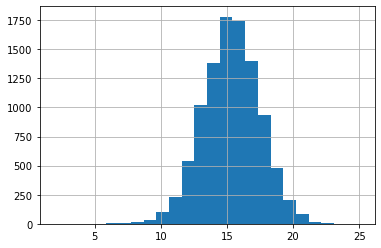

In [83]:
customers[customers.customer_id != 5860]['total_transactions'].hist(bins=24)

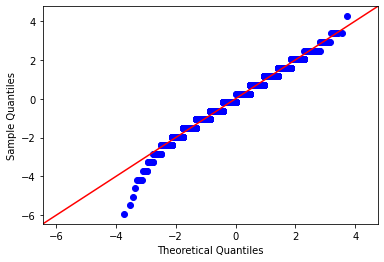

In [84]:
sm.qqplot(customers[customers.customer_id != 5860]['total_transactions'], fit=True, line='45')

plt.show()

In [85]:
transactions_per_cluster = df_transactions.groupby(
    ['customer_id', 'cluster'])['amount'].count().unstack().fillna(0)

In [86]:
customers['max_transactions_cluster'] = transactions_per_cluster.max(axis=1)
customers['mean_transactions_cluster'] = transactions_per_cluster.mean(axis=1)
customers['max_transactions_cluster_%_of_total'] = customers.max_transactions_cluster / customers.total_transactions


In [87]:
customers.sort_values('max_transactions_cluster_%_of_total', ascending=False)[:5]

,customer_id,total_transactions,total_amount,transactions_credit,amount_credit,transactions_debit,amount_debit,amount_per_transaction,amount_%_credit,transactions_%_credit,...,amount_credit_FI,transactions_debit_FI,amount_debit_FI,transactions_credit_DK,amount_credit_DK,transactions_debit_DK,amount_debit_DK,max_transactions_cluster,mean_transactions_cluster,max_transactions_cluster_%_of_total
497,497,6,17283,4.0,10378.0,2.0,6905.0,2880.500000,0.600474,0.666667,...,0.0,1.0,3553.0,3.0,7328.0,1.0,3553.0,4.0,0.260870,0.666667
2985,2985,5,29475,2.0,11883.0,3.0,17592.0,5895.000000,0.403155,0.400000,...,5731.0,1.0,5619.0,1.0,6152.0,1.0,5619.0,3.0,0.217391,0.600000
8816,8816,2,6637,2.0,6637.0,0.0,0.0,3318.500000,1.000000,1.000000,...,0.0,0.0,0.0,2.0,6637.0,0.0,0.0,1.0,0.086957,0.500000
4612,4612,7,40643,1.0,5342.0,6.0,35301.0,5806.142857,0.131437,0.142857,...,5342.0,3.0,18175.0,0.0,0.0,3.0,18175.0,3.0,0.304348,0.428571
5958,5958,8,34084,5.0,20999.0,3.0,13085.0,4260.500000,0.616096,0.625000,...,13409.0,0.0,0.0,2.0,4411.0,0.0,0.0,3.0,0.347826,0.375000


In [88]:
# trying pca - with no much hope..

x = StandardScaler().fit_transform(customers[['total_transactions', 'total_amount',
                                             'amount_per_transaction', 'max_amount_credit', 'max_amount_debit',
                                             'amount_%_credit', 'transactions_%_credit', 'max_transactions_cluster',
                                             'max_transactions_cluster_%_of_total']])
columns = ['principal component {}'.format(i) for i in range (1, 10)]

pca = PCA(n_components=9)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = columns)

principalDf[:5]
#pca.explained_variance_ratio_

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9
0,-0.453873,0.079663,0.665579,-0.888121,0.050022,0.173984,-0.363510,-0.123647,0.050127
1,-0.694863,1.035349,-0.762460,0.184292,0.091827,-0.053722,0.011388,0.171884,-0.010036
2,-0.571983,0.147789,0.510812,-0.477323,0.052100,-0.436678,-0.141082,0.040575,0.007681
3,-2.346906,-2.362316,3.347930,5.315798,0.318270,-0.226515,0.078021,0.048760,0.152843
4,-0.955216,0.970294,-0.770182,0.914359,-0.016380,-0.136560,0.194428,0.001466,-0.011407


In [89]:
pca.explained_variance_ratio_

array([3.02450801e-01, 2.22608470e-01, 2.21316589e-01, 1.14459064e-01,
       8.24700099e-02, 4.35048765e-02, 1.09942095e-02, 2.09262393e-03,
       1.03355840e-04])

In [574]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0, verbose=0)
kmeans.fit(customers[['total_transactions', 'total_amount',
                                             'amount_per_transaction', 'max_amount_credit', 'max_amount_debit',
                                             'amount_%_credit', 'transactions_%_credit', 'max_transactions_cluster',
                                             'max_transactions_cluster_%_of_total']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [570]:
wcss = []

for i in tqdm(range(2, 20), total=18):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(customers[['total_transactions', 'total_amount',
                                             'amount_per_transaction', 'max_amount_credit', 'max_amount_debit',
                                             'amount_%_credit', 'transactions_%_credit', 'max_transactions_cluster',
                                             'max_transactions_cluster_%_of_total']])
    wcss.append(kmeans.inertia_)

100%|██████████| 18/18 [00:18<00:00,  1.04s/it]


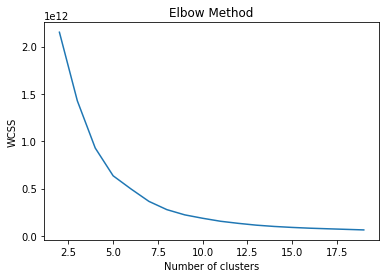

In [571]:
plt.plot(range(2, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [95]:
import hdbscan

In [123]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=50)
cluster_labels = clusterer.fit_predict(customers[['total_transactions', 'total_amount',
                                             'amount_per_transaction', 'max_amount_credit', 'max_amount_debit',
                                             'amount_%_credit', 'transactions_%_credit', 'max_transactions_cluster',
                                             'max_transactions_cluster_%_of_total']])

<AxesSubplot:ylabel='$\\lambda$ value'>

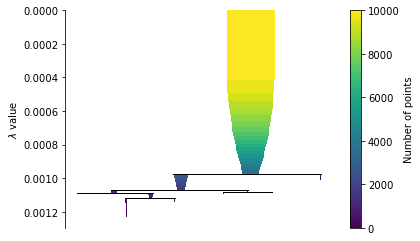

In [124]:
clusterer.condensed_tree_.plot()

In [120]:
len(clusterer.outlier_scores_)

10000

In [129]:
clusterer.outlier_scores_

array([0.12614871, 0.00051403, 0.17424427, ..., 0.02695225, 0.02219786,
       0.08323086])

In [133]:
np.where(clusterer.outlier_scores_ >= 0.9)

(array([ 497,  570, 1223, 1349, 1397, 1467, 1519, 2788, 2797, 2845, 4381,
        4998, 5860, 6125, 6190, 7170, 8286, 8816, 9360, 9555, 9818],
       dtype=int64),)

In [138]:
df_transactions[df_transactions.customer_id == 9360]

,customer_id,credit,amount,counterparty_country,amount_tilde,cluster
4869,9360,Debit,6943,DK,-6943,0
14690,9360,Credit,6726,FI,6726,2
16382,9360,Credit,7403,FI,7403,2
23560,9360,Credit,8310,SE,8310,3
28966,9360,Credit,5879,SE,5879,4
31013,9360,Credit,5722,FI,5722,4
38379,9360,Debit,7311,SE,-7311,5
45584,9360,Credit,7232,FI,7232,6
54087,9360,Debit,8423,DK,-8423,8
61785,9360,Debit,7513,SE,-7513,9


C:\Users\ragus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ragus\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

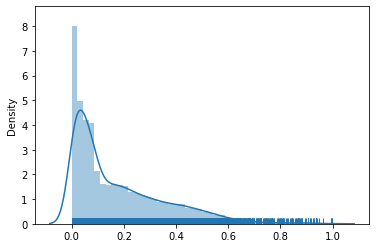

In [125]:
sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)

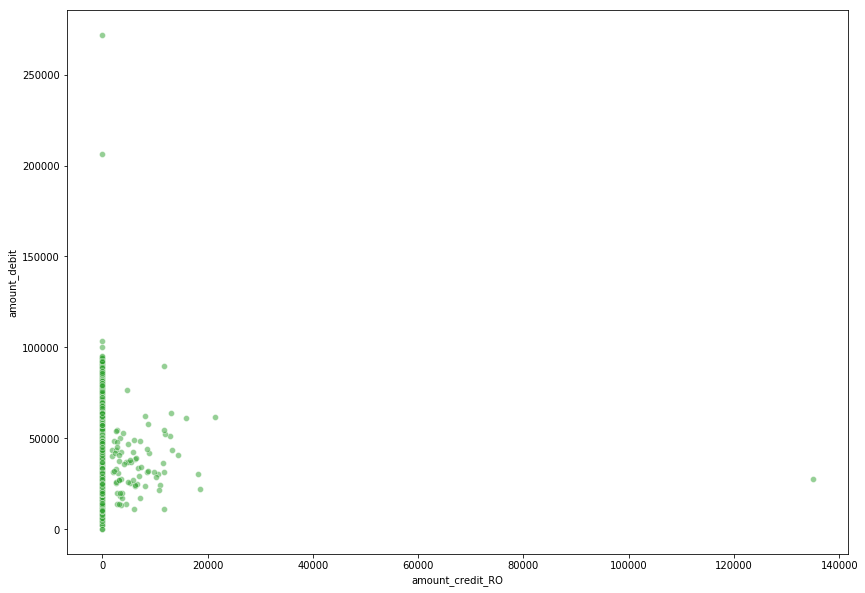

In [540]:
plt.figure(figsize=(14, 10))

ax = sns.scatterplot(x='amount_credit_RO', y='amount_debit', 
                     #hue=countries_cr_std['confirmation_id'][:30],
                     data=customers[customers.customer_id <> 5860],
                     color='tab:green', palette='summer', alpha=0.5,
                     legend='brief')
#                    sizes=(minsize, maxsize))

In [ ]:
# max - mean - 2std ??

# 8141 has only credits

In [518]:
df_transactions[df_transactions.customer_id == 9823]

,customer_id,credit,amount,counterparty_country,amount_tilde,cluster
24234,9823,Debit,3813,FI,-3813,3
37787,9823,Debit,4326,DK,-4326,5
42882,9823,Debit,2547,DK,-2547,6
53642,9823,Debit,4615,DK,-4615,7
65035,9823,Debit,4969,FI,-4969,9
76691,9823,Debit,4579,SE,-4579,11
81724,9823,Debit,3102,SE,-3102,12
85810,9823,Debit,4010,DK,-4010,12
101753,9823,Debit,4064,DK,-4064,15
114627,9823,Debit,3938,FI,-3938,16


In [516]:
customers.sort_values('amount_%_credit', ascending=False)

,customer_id,total_transactions,total_amount,transactions_credit,amount_credit,transactions_debit,amount_debit,amount_per_transaction,max_amount_credit,max_amount_debit,transactions_credit_RO,amount_credit_RO,transactions_debit_RO,amount_debit_RO,amount_%_credit,transactions_%_credit,max_transactions_cluster,mean_transactions_cluster,max_transactions_cluster_%_of_total
8141,8141,14,52259,14.0,52259.0,0.0,0.0,3732.785714,7951.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,2.0,0.608696,0.142857
8816,8816,2,6637,2.0,6637.0,0.0,0.0,3318.500000,3431.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.0,0.086957,0.500000
6057,6057,19,108106,18.0,102755.0,1.0,5351.0,5689.789474,6843.0,5351.0,0.0,0.0,0.0,0.0,0.950502,0.947368,2.0,0.826087,0.105263
6676,6676,15,95469,14.0,89464.0,1.0,6005.0,6364.600000,7894.0,6005.0,0.0,0.0,0.0,0.0,0.937100,0.933333,2.0,0.652174,0.133333
8200,8200,13,32944,12.0,30718.0,1.0,2226.0,2534.153846,3873.0,2226.0,0.0,0.0,0.0,0.0,0.932431,0.923077,1.0,0.565217,0.076923
1154,1154,16,98791,15.0,91897.0,1.0,6894.0,6174.437500,7019.0,6894.0,0.0,0.0,0.0,0.0,0.930216,0.937500,2.0,0.695652,0.125000
9700,9700,12,56734,10.0,52366.0,2.0,4368.0,4727.833333,7444.0,2705.0,0.0,0.0,0.0,0.0,0.923009,0.833333,1.0,0.521739,0.083333
2883,2883,12,51143,11.0,46540.0,1.0,4603.0,4261.916667,4674.0,4603.0,0.0,0.0,0.0,0.0,0.909997,0.916667,2.0,0.521739,0.166667
3699,3699,12,57401,11.0,52078.0,1.0,5323.0,4783.416667,5413.0,5323.0,0.0,0.0,0.0,0.0,0.907266,0.916667,2.0,0.521739,0.166667
1890,1890,10,41013,8.0,37026.0,2.0,3987.0,4101.300000,6387.0,2193.0,0.0,0.0,0.0,0.0,0.902787,0.800000,1.0,0.434783,0.100000


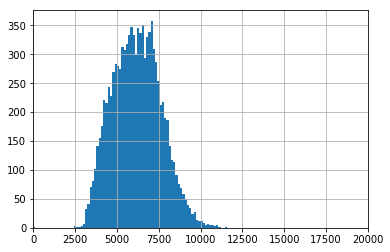

In [441]:
customers.max_amount_credit.hist(bins=1000)

plt.xlim(0, 20000)
plt.show()

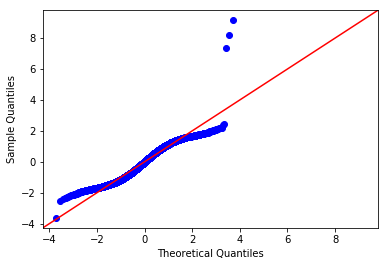

In [437]:
sm.qqplot(customers.max_amount_credit, fit=True, line ='45')

plt.show()